In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Normalization
from keras.callbacks import EarlyStopping, TensorBoard
from keras.utils import plot_model, to_categorical

from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import os


# Підготовка даних

In [3]:
wines = pd.read_csv(
      "data/winequality-red.csv", 
      names=[
            "Fixed acidity",
            "Volatile acidity",
            "Citric acid",
            "Residual sugar",
            "Chlorides",
            "Free sulfur dioxide",
            "Total sulfur dioxide",
            "Density",
            "pH",
            "Sulphates",
            "Alcohol",
            "Quality",
      ]
)

wines

,Fixed acidity,Volatile acidity,Citric acid,Residual sugar,Chlorides,Free sulfur dioxide,Total sulfur dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed acidity         1599 non-null   float64
 1   Volatile acidity      1599 non-null   float64
 2   Citric acid           1599 non-null   float64
 3   Residual sugar        1599 non-null   float64
 4   Chlorides             1599 non-null   float64
 5   Free sulfur dioxide   1599 non-null   float64
 6   Total sulfur dioxide  1599 non-null   float64
 7   Density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   Sulphates             1599 non-null   float64
 10  Alcohol               1599 non-null   float64
 11  Quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wines["Quality"].value_counts()

Quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [6]:
wines_conditions = [
    (wines['Quality'] < 6),
    (wines['Quality'] == 6),
    (wines['Quality'] > 6),
]

wines_quality = [0, 1, 2] # ['Bad', 'Great', 'Good']
N_CLASSES = len(wines_quality)

wines["Quality"] = np.select(wines_conditions, wines_quality)

wines["Quality"].value_counts()

Quality
0    744
1    638
2    217
Name: count, dtype: int64

In [7]:
wines_features = np.array(wines.drop('Quality', axis=1))

wines_features, wines_features.shape

(array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
        [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
        [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
        ...,
        [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
        [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
        [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]]),
 (1599, 11))

In [8]:
wines_target = np.array(wines['Quality'])

wines_target, wines_target.shape

(array([0, 0, 0, ..., 1, 0, 1]), (1599,))

In [9]:
wines_features_train, wines_features_test, wines_target_train, wines_target_test = train_test_split(wines_features, wines_target, test_size=0.25, shuffle=True)

wines_target_train = to_categorical(wines_target_train, num_classes=N_CLASSES)
wines_target_test = to_categorical(wines_target_test, num_classes=N_CLASSES)

In [10]:
wines_normalization = Normalization()

wines_normalization.adapt(wines_features)

In [11]:
wines_normalization(wines_features[:5])

<tf.Tensor: shape=(5, 11), dtype=float32, numpy=
array([[-0.5283596 ,  0.9618766 , -1.3914723 , -0.4532184 , -0.24370667,
        -0.4661925 , -0.3791327 ,  0.55828106,  1.2886434 , -0.5792064 ,
        -0.9602465 ],
       [-0.29854733,  1.9674424 , -1.3914723 ,  0.04341609,  0.22387522,
         0.8726383 ,  0.62436324,  0.02827419, -0.7199325 ,  0.12895055,
        -0.584777  ],
       [-0.29854733,  1.2970651 , -1.1860706 , -0.16942725,  0.09635295,
        -0.08366945,  0.22904666,  0.13426293, -0.33117616, -0.04808887,
        -0.584777  ],
       [ 1.654856  , -1.3844436 ,  1.4841536 , -0.4532184 , -0.2649603 ,
         0.1075921 ,  0.41150045,  0.6643014 , -0.9791034 , -0.46118036,
        -0.584777  ],
       [-0.5283596 ,  0.9618766 , -1.3914723 , -0.4532184 , -0.24370667,
        -0.4661925 , -0.3791327 ,  0.55828106,  1.2886434 , -0.5792064 ,
        -0.9602465 ]], dtype=float32)>

# Створення моделей

In [12]:
def make_model(*layers):
      model = Sequential([
            wines_normalization, 
            *layers
      ])
      
      model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
      
      return model

# Модель з прошарками DropOut

In [13]:
model_with_dropout_0_5 = make_model(
      Dense(128, activation='relu'),
      Dropout(0.5),
      Dense(64, activation='relu'),
      Dropout(0.5),
      Dense(N_CLASSES, activation='softmax')
)

In [14]:
model_with_dropout_0_2 = make_model(
      Dense(128, activation='relu'),
      Dropout(0.2),
      Dense(64, activation='relu'),
      Dropout(0.2),
      Dense(N_CLASSES, activation='softmax')
)

# Модель без DropOut

In [15]:
model_simple = make_model(
      Dense(128, activation='relu'),
      Dense(64, activation='relu'),
      Dense(N_CLASSES, activation='softmax')
)

# Модель з іншою кількістю прошарків

In [16]:
model_more_layers = make_model(
      Dense(256, activation='relu'),
      Dense(128, activation='relu'),
      Dense(64, activation='relu'),
      Dense(32, activation='relu'),
      Dense(16, activation='relu'),
      Dense(8, activation='relu'),
      Dense(4, activation='relu'),
      Dense(N_CLASSES, activation='softmax')
)

# Директорія для зберігання логів

In [17]:
log_dir = os.path.join("logs", "fit", "model")

os.makedirs(log_dir, exist_ok=True)

# Налаштування колбеків

In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Навчання моделі з використанням колбеків

In [19]:
EPOCHS = 50

In [20]:
def fit_model(model, *callbacks):
      model.summary()
      
      history = model.fit(
            wines_features_train,
            wines_target_train,
            epochs=EPOCHS,
            validation_data=(
                  wines_features_test,
                  wines_target_test
            ),
            callbacks=callbacks,
      )

      return history

In [21]:
models = [
      (model_with_dropout_0_5, tensorboard, early_stopping),
      (model_with_dropout_0_5, tensorboard),
      (model_with_dropout_0_2, tensorboard, early_stopping),
      (model_with_dropout_0_2, tensorboard),
      (model_simple, tensorboard, early_stopping),
      (model_simple, tensorboard),
      (model_more_layers, tensorboard, early_stopping),
      (model_more_layers, tensorboard),
]

In [22]:
histories = [fit_model(model_data[0], *model_data[1:]) for model_data in models]

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (1599, 11)             │            23 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23 (96.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23 (96.00 B)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3599 - loss: 1.1775 - val_accuracy: 0.5475 - val_loss: 0.9312
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5268 - loss: 0.9584 - val_accuracy: 0.5875 - val_loss: 0.8522
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5379 - loss: 0.8841 - val_accuracy: 0.5950 - val_loss: 0.8231
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.6050 - loss: 0.8437 - val_accuracy: 0.6150 - val_loss: 0.8088
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5872 - loss: 0.8126 - val_accuracy: 0.6075 - val_loss: 0.7979
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5866 - loss: 0.8267 - val_accuracy: 0.6150 - val_loss: 0.7924
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6061 - loss: 0.7990 - val_accuracy: 0.6200 - val_loss: 0.7890
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6209 - loss: 0.7851 - val_accuracy: 0.6050 - val_los

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 11)             │            23 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,986 (117.14 KB)

 Trainable params: 9,987 (39.01 KB)

 Non-trainable params: 23 (96.00 B)

 Optimizer params: 19,976 (78.04 KB)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6523 - loss: 0.7610 - val_accuracy: 0.6250 - val_loss: 0.7804
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.6453 - loss: 0.7414 - val_accuracy: 0.6225 - val_loss: 0.7836
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.6414 - loss: 0.7341 - val_accuracy: 0.6175 - val_loss: 0.7848
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.6443 - loss: 0.7465 - val_accuracy: 0.6225 - val_loss: 0.7852
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.6629 - loss: 0.7233 - val_accuracy: 0.6175 - val_loss: 0.7853
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.6642 - loss: 0.7307 - val_accuracy: 0.6125 - val_loss: 0.7875
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.6606 - loss: 0.7159 - val_accuracy: 0.6200 - val_loss: 0.7871
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.6379 - loss: 0.7230 - val_accuracy: 0.63

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 11)             │            23 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23 (96.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23 (96.00 B)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4099 - loss: 1.0590 - val_accuracy: 0.6050 - val_loss: 0.8797
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6031 - loss: 0.8423 - val_accuracy: 0.6050 - val_loss: 0.8184
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5974 - loss: 0.8052 - val_accuracy: 0.6150 - val_loss: 0.8024
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6560 - loss: 0.7631 - val_accuracy: 0.6150 - val_loss: 0.8047
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.6166 - loss: 0.7583 - val_accuracy: 0.6050 - val_loss: 0.7968


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 11)             │            23 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,986 (117.14 KB)

 Trainable params: 9,987 (39.01 KB)

 Non-trainable params: 23 (96.00 B)

 Optimizer params: 19,976 (78.04 KB)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5926 - loss: 0.8490 - val_accuracy: 0.6125 - val_loss: 0.8227
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.5947 - loss: 0.8128 - val_accuracy: 0.6225 - val_loss: 0.8061
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6286 - loss: 0.7803 - val_accuracy: 0.6250 - val_loss: 0.8026
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6385 - loss: 0.7647 - val_accuracy: 0.6175 - val_loss: 0.8149
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6450 - loss: 0.7457 - val_accuracy: 0.6125 - val_loss: 0.8033
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6817 - loss: 0.6908 - val_accuracy: 0.6325 - val_loss: 0.7973
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6531 - loss: 0.7262 - val_accuracy: 0.6225 - val_loss: 0.8013
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.6675 - loss: 0.7127 - val_accuracy: 0.6250 - val_l

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 11)             │            23 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23 (96.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23 (96.00 B)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5250 - loss: 0.9755 - val_accuracy: 0.6150 - val_loss: 0.8317
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6349 - loss: 0.7734 - val_accuracy: 0.6050 - val_loss: 0.8010
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6444 - loss: 0.7363 - val_accuracy: 0.6175 - val_loss: 0.8026
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6583 - loss: 0.7011 - val_accuracy: 0.6175 - val_loss: 0.8078
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.6861 - loss: 0.6740 - val_accuracy: 0.6150 - val_loss: 0.7955


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 11)             │            23 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,986 (117.14 KB)

 Trainable params: 9,987 (39.01 KB)

 Non-trainable params: 23 (96.00 B)

 Optimizer params: 19,976 (78.04 KB)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6468 - loss: 0.7606 - val_accuracy: 0.6150 - val_loss: 0.8091
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6356 - loss: 0.7158 - val_accuracy: 0.6100 - val_loss: 0.8020
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6740 - loss: 0.6951 - val_accuracy: 0.6250 - val_loss: 0.7993
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6840 - loss: 0.6847 - val_accuracy: 0.6225 - val_loss: 0.8019
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6982 - loss: 0.6476 - val_accuracy: 0.6200 - val_loss: 0.8048
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6987 - loss: 0.6829 - val_accuracy: 0.6225 - val_loss: 0.8017
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.7001 - loss: 0.6439 - val_accuracy: 0.6325 - val_loss: 0.7911
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.7091 - loss: 0.6220 - val_accuracy: 0.6125 - val_l

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 11)             │            23 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23 (96.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23 (96.00 B)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5475 - loss: 1.0616 - val_accuracy: 0.5850 - val_loss: 0.8673
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5993 - loss: 0.8353 - val_accuracy: 0.6100 - val_loss: 0.8352
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6344 - loss: 0.7655 - val_accuracy: 0.6150 - val_loss: 0.8098
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6310 - loss: 0.7466 - val_accuracy: 0.6275 - val_loss: 0.8124
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6285 - loss: 0.7314 - val_accuracy: 0.6100 - val_loss: 0.8155


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 11)             │            23 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141,082 (551.11 KB)

 Trainable params: 47,019 (183.67 KB)

 Non-trainable params: 23 (96.00 B)

 Optimizer params: 94,040 (367.35 KB)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5750 - loss: 0.8720 - val_accuracy: 0.6000 - val_loss: 0.8324
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6220 - loss: 0.7661 - val_accuracy: 0.6150 - val_loss: 0.8167
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6517 - loss: 0.7239 - val_accuracy: 0.6050 - val_loss: 0.8202
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6333 - loss: 0.7172 - val_accuracy: 0.6050 - val_loss: 0.8302
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6605 - loss: 0.7047 - val_accuracy: 0.6150 - val_loss: 0.8067
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6524 - loss: 0.6956 - val_accuracy: 0.6225 - val_loss: 0.8049
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6562 - loss: 0.6776 - val_accuracy: 0.6250 - val_loss: 0.8102
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6741 - loss: 0.6527 - val_accuracy: 0.6025 - val_loss:

Accuracy: 0.6413677930831909
Loss: 0.7349050641059875
Accuracy: 0.6613844633102417
Loss: 0.6835240721702576
Accuracy: 0.6413677930831909
Loss: 0.7441883087158203
Accuracy: 0.7456213235855103
Loss: 0.5621423125267029
Accuracy: 0.6705588102340698
Loss: 0.6916337013244629
Accuracy: 0.8557130694389343
Loss: 0.3750332295894623
Accuracy: 0.635529637336731
Loss: 0.7148045301437378
Accuracy: 0.9349457621574402
Loss: 0.17026536166667938


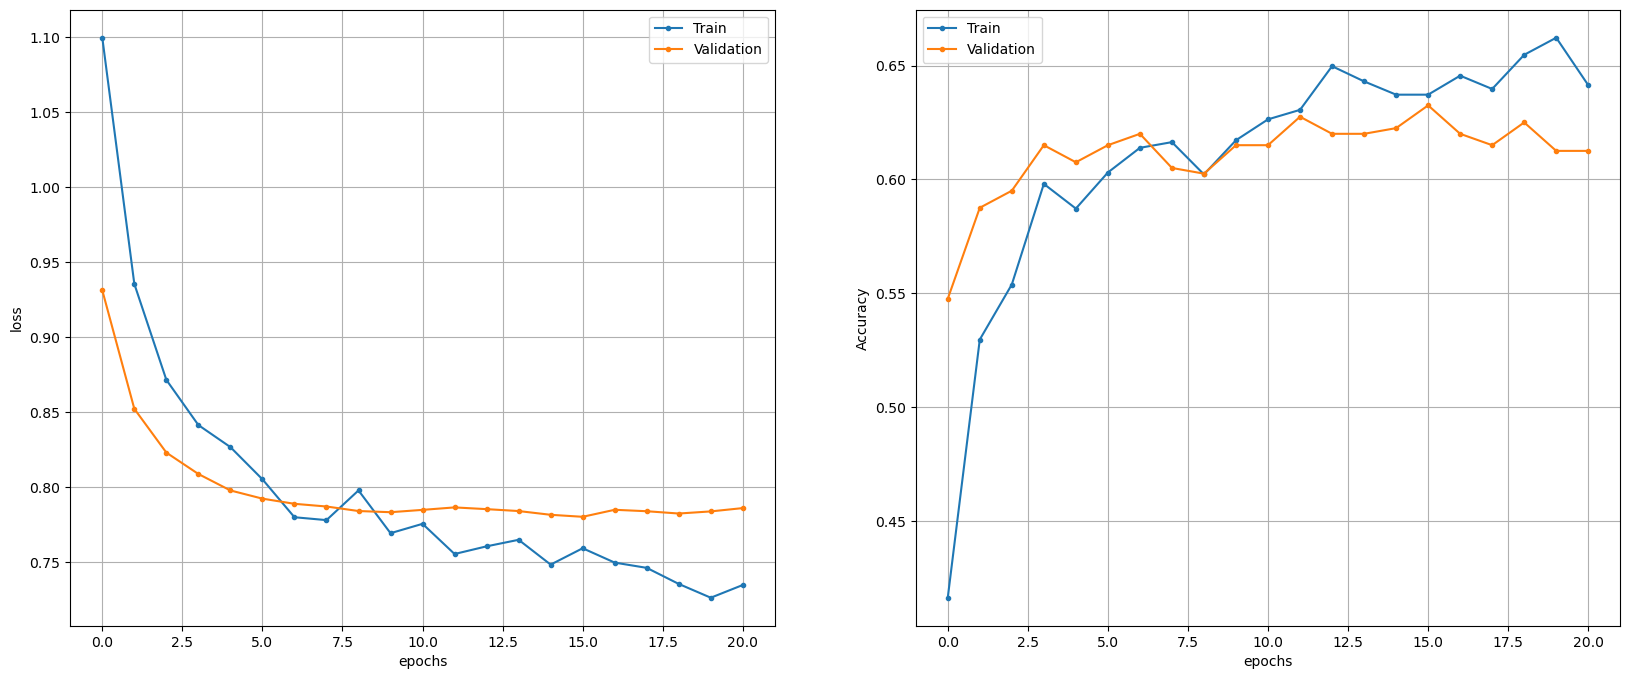

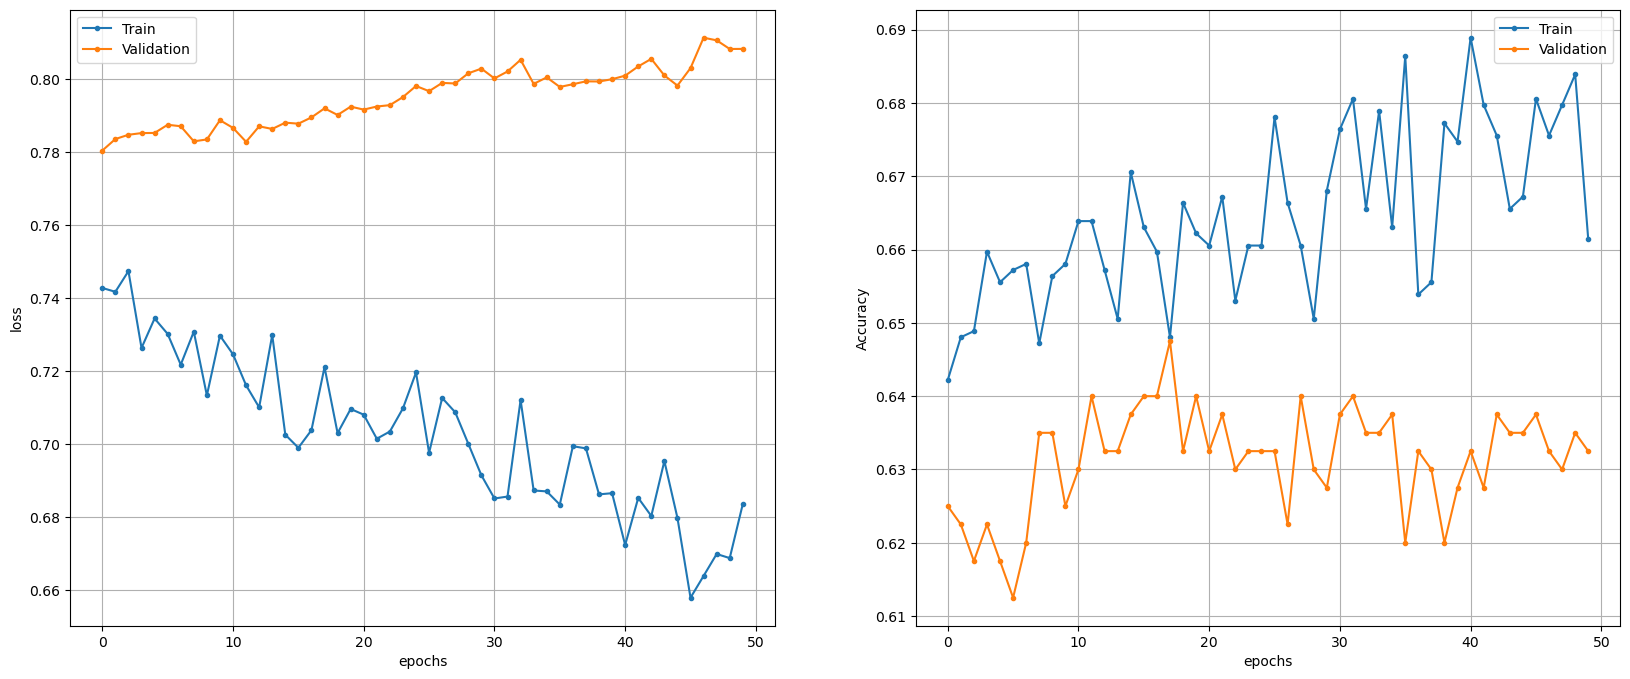

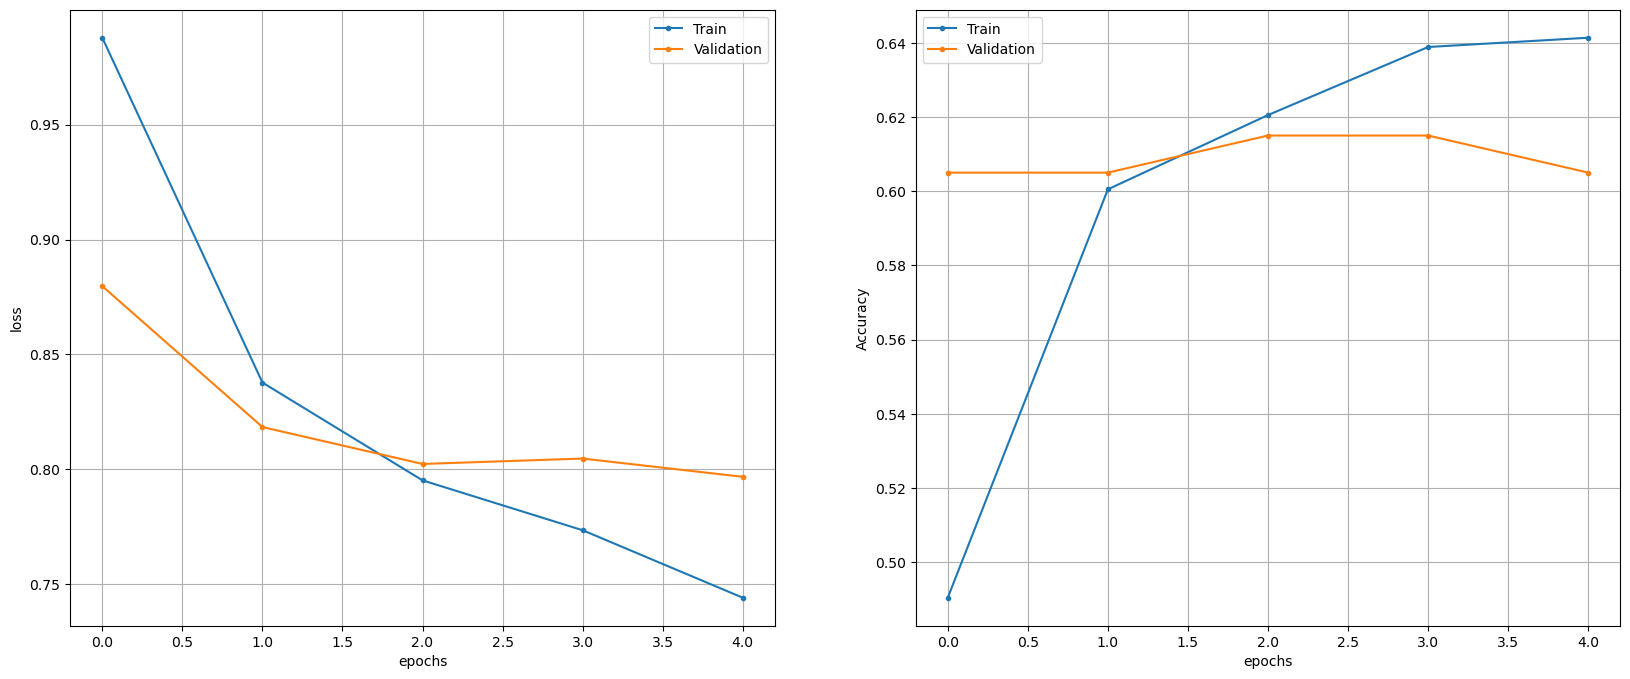

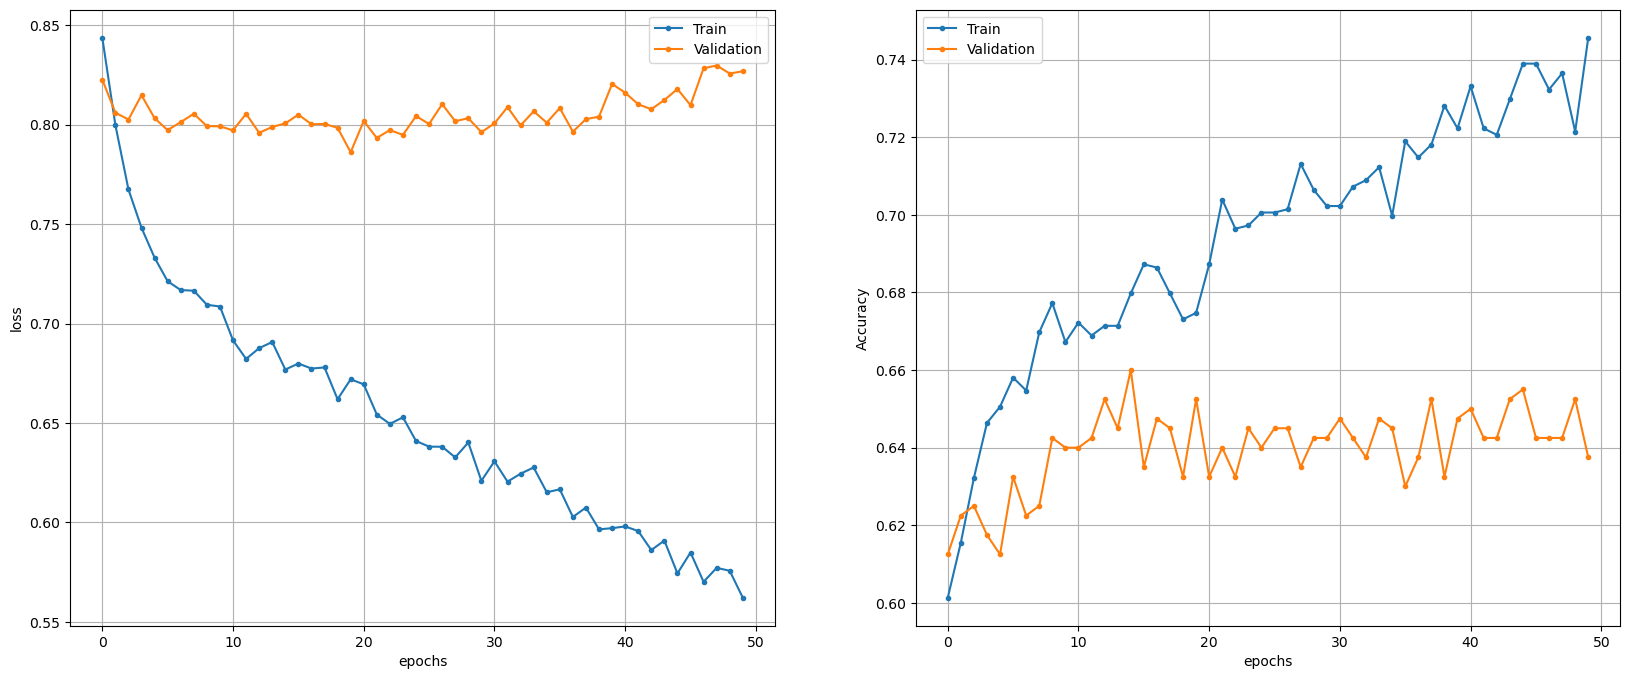

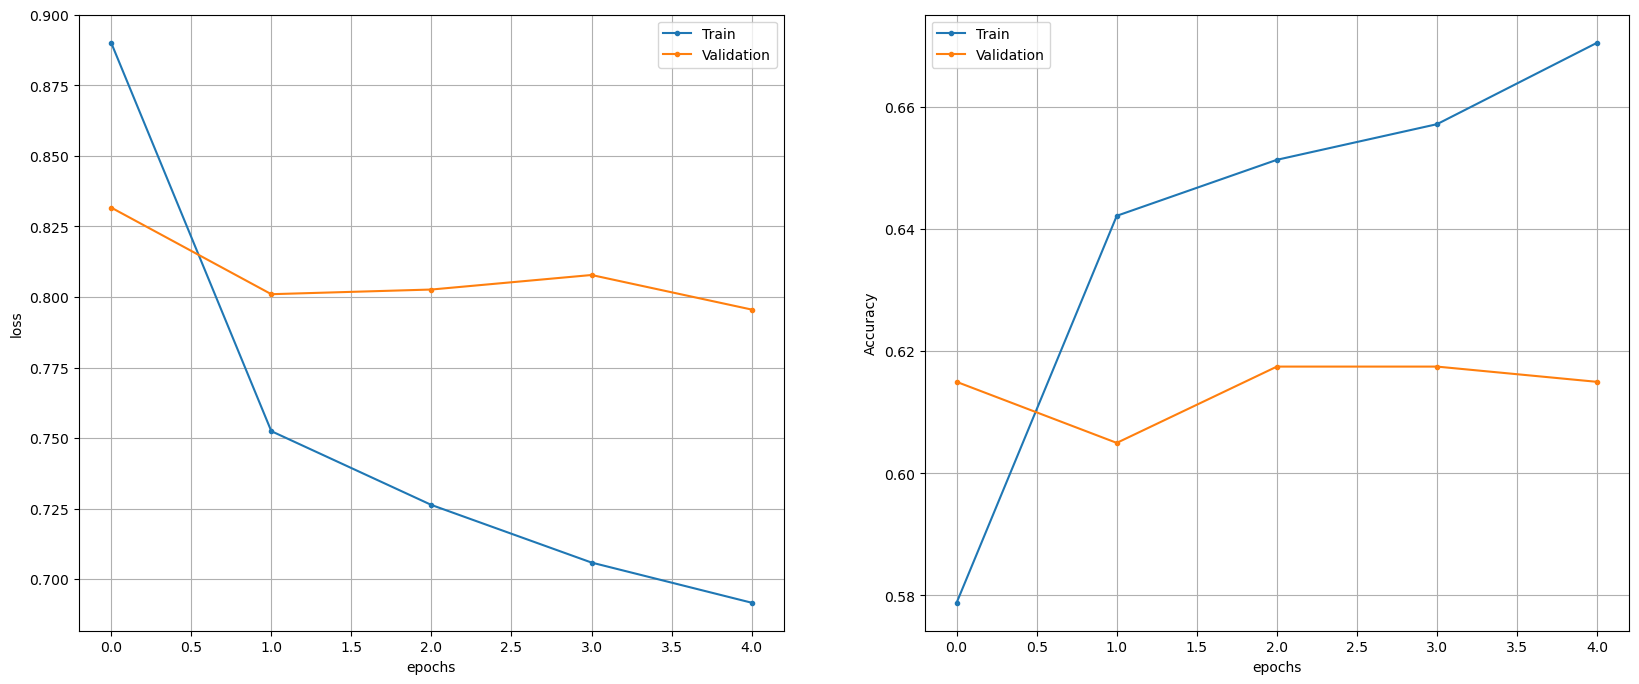

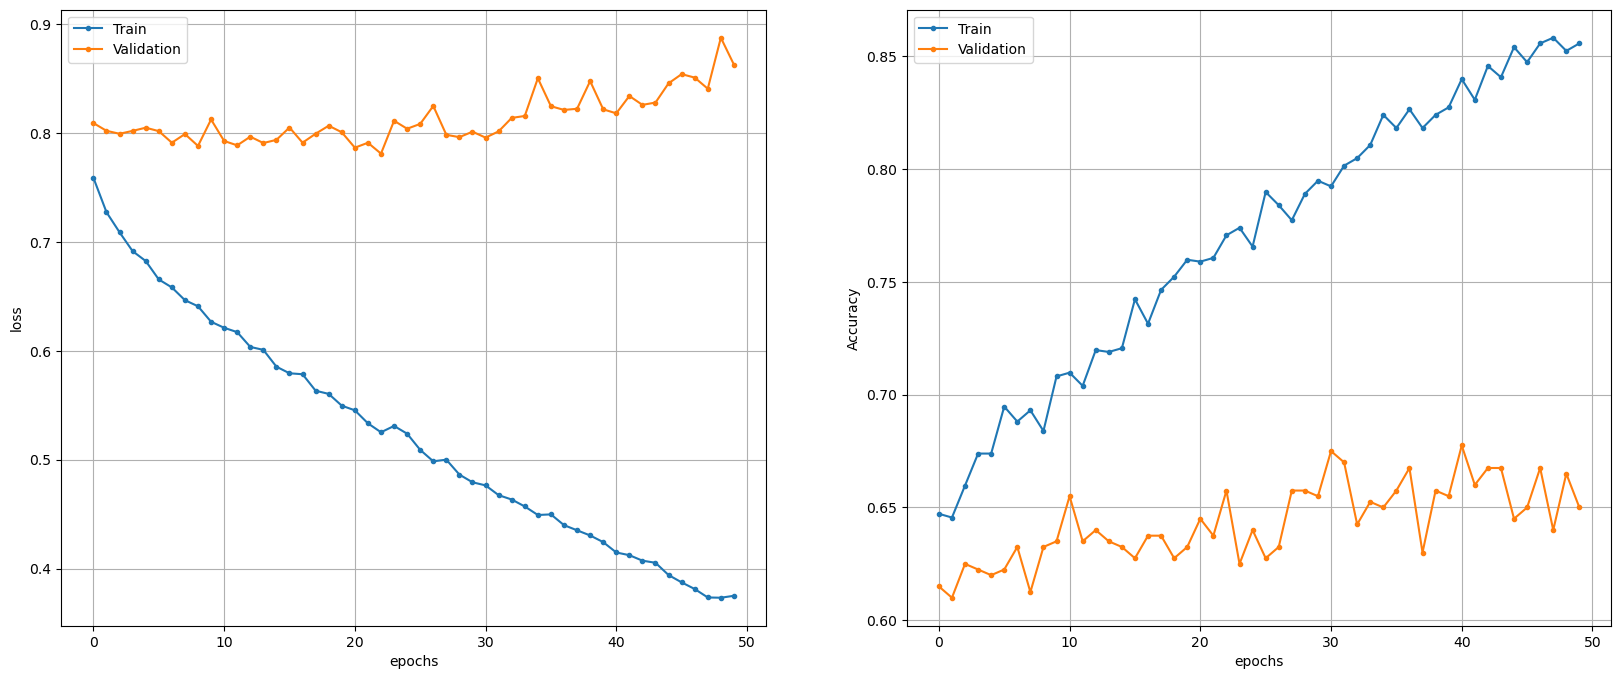

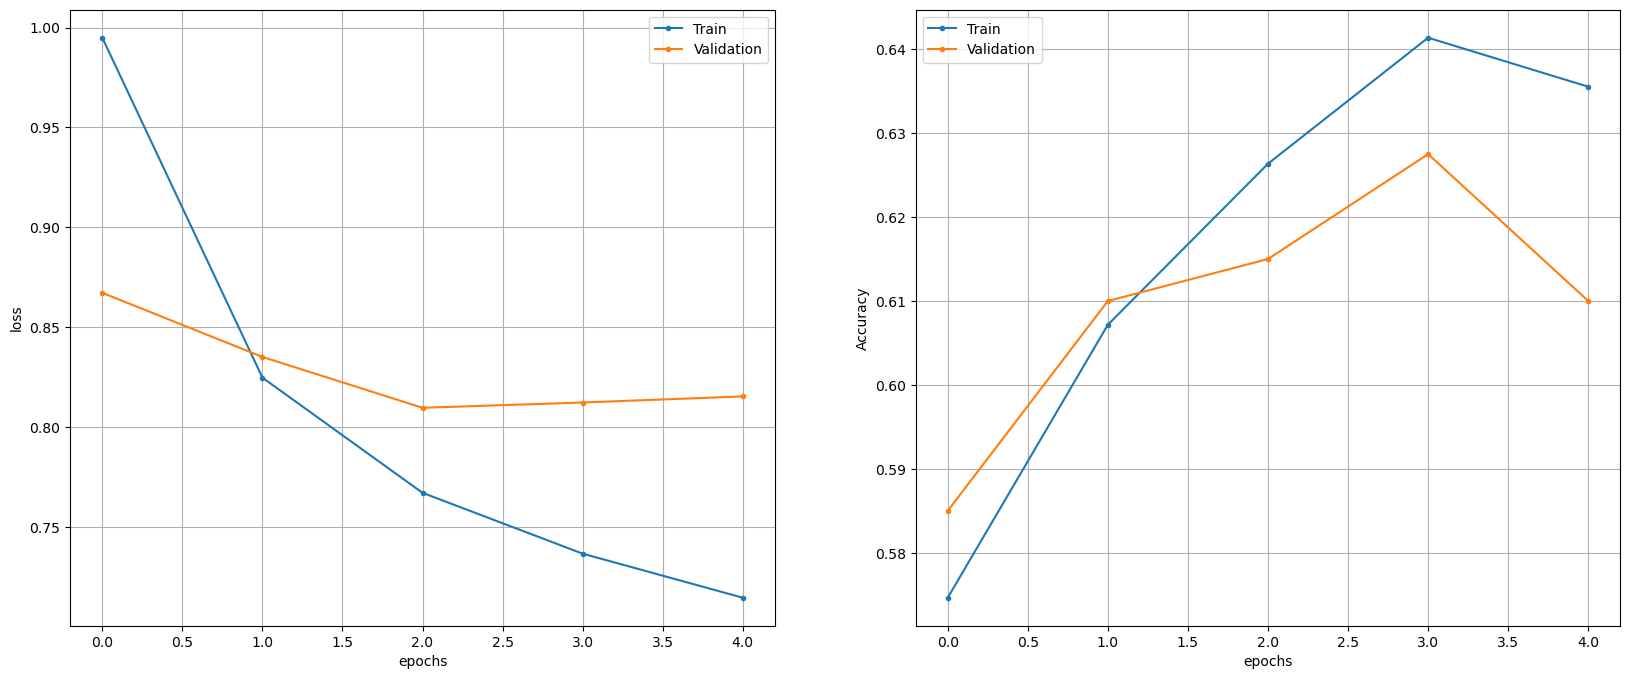

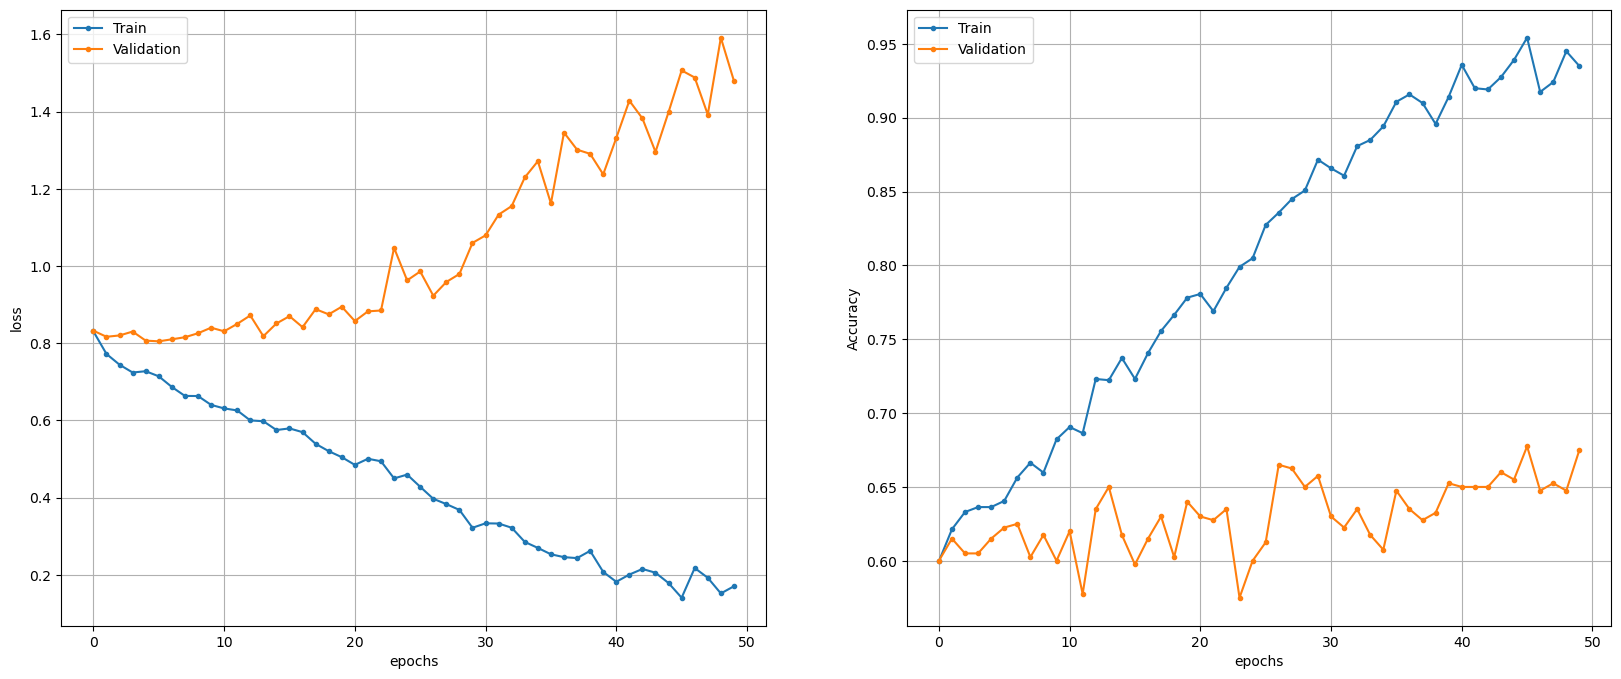

In [23]:

for index, history in enumerate(histories):
      history_data = history.history
      epochs = range(len(history_data['loss']))
      plt.figure(figsize=(20, 8))
      plt.subplot(121)
      plt.plot(epochs, history_data['loss'], '.-', epochs, history_data['val_loss'], '.-')
      plt.grid(True)
      plt.xlabel('epochs')
      plt.ylabel('loss')
      plt.legend(['Train', 'Validation'])

      plt.subplot(122)
      plt.plot(epochs, history_data['accuracy'], '.-', epochs, history_data['val_accuracy'], '.-')
      plt.grid(True)
      plt.xlabel('epochs')
      plt.ylabel('Accuracy')
      plt.legend(['Train', 'Validation'])

      print('Accuracy:', (history_data['accuracy'][-1])) 
      print('Loss:', (history_data['loss'][-1]))


In [24]:
for model_data in models:
      model = model_data[0]
      loss, metric = model.evaluate(wines_features_test, wines_target_test)

      print('Test loss:', loss)
      print('Test metric:', metric)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.6325 - loss: 0.8118
Test loss: 0.8083005547523499
Test metric: 0.6324999928474426
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.6351 - loss: 0.8064
Test loss: 0.8083005547523499
Test metric: 0.6324999928474426
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.6750 - loss: 0.8289
Test loss: 0.8268796801567078
Test metric: 0.637499988079071
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.6759 - loss: 0.8310
Test loss: 0.8268796801567078
Test metric: 0.637499988079071
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.6529 - loss: 0.8347
Test loss: 0.8627586364746094
Test metric: 0.6499999761581421
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.6529 - loss: 0.8347
Test loss: 0.8627586364746094
Test metric: 0.6499999761581421
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.6725 - loss: 1.4566
Test loss: 1.479770302772522
Test metric: 0.675000011920929
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - ac

In [179]:
def predict(model):
      predictions = model.predict(wines_features_test)
      predicted_classes = np.argmax(predictions, axis=1)

      predicted_classes = pd.Series(predicted_classes, name='Predicted Quality')
      predicted_classes = pd.concat([pd.Series(wines_target_test.argmax(axis=1), name='True Quality'), predicted_classes], axis=1)

      predicted_classes['Correct'] = predicted_classes['True Quality'] == predicted_classes['Predicted Quality']

      print(predicted_classes['Correct'].value_counts())
      
      return predicted_classes

In [181]:
predictions = [predict(model_data[0]) for model_data in models]


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
Correct
True     274
False    126
Name: count, dtype: int64
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step
Correct
True     274
False    126
Name: count, dtype: int64
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step
Correct
True     270
False    130
Name: count, dtype: int64
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step
Correct
True     270
False    130
Name: count, dtype: int64
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step
Correct
True     272
False    128
Name: count, dtype: int64
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
Correct
True     272
False    128
Name: count, dtype: int64
